In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [3]:
data=pd.read_csv("train_tweets.csv",encoding = "ISO-8859-1")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦
7,8,0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


<IPython.core.display.Javascript object>


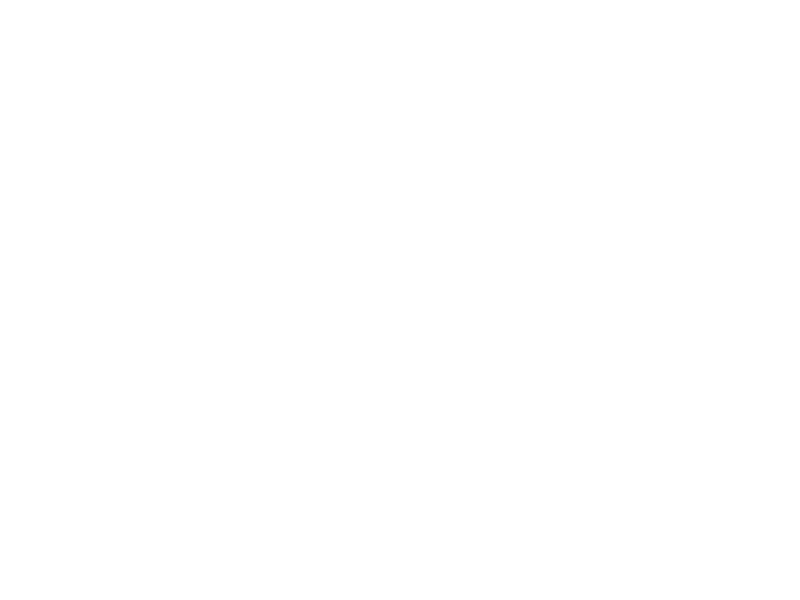

In [4]:
%matplotlib notebook

data.label.value_counts().plot(kind='bar')


In [5]:
stemmer=SnowballStemmer("english")
words=stopwords.words("english")

In [6]:
data['clean'] = data['tweet'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
data.head()

,id,label,tweet,clean
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


In [7]:
#resampling classes
df_majority_train=data[data.label==0].sample(n=4000,random_state=1)
df_minority_train = data[data.label==1][:2000]

train= pd.concat([df_majority_train,df_minority_train])

df_majority_test=data[data.label==0].sample(n=500,random_state=1)
df_minority_test=data[data.label==1][-242:]

test=pd.concat([df_majority_test,df_minority_test])


In [8]:
print("train length:",len(train),"\ntest length:",len(test))
print("train labels:\n",train.label.value_counts(),"\n test labels: \n",test.label.value_counts())

train length: 6000 
test length: 742
train labels:
 0    4000
1    2000
Name: label, dtype: int64 
 test labels: 
 0    500
1    242
Name: label, dtype: int64


# Model selection

In [9]:
def model_selection():
    %matplotlib inline
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    
    X_train, X_test, y_train, y_test = train_test_split(train['clean'],train['label'], test_size=0.3,random_state=0)
    models=[]
    models.append(('SVM', LinearSVC()))
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('Decision tree', DecisionTreeClassifier(max_depth = 10)))
    models.append(('Naive Bayes', MultinomialNB()))
    models.append(('Kernalized-SVC', SVC(kernel='rbf')))
    models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
    
    results = []
    names = []
    scoring = 'f1'
    
    for name,model in models:
        pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                        ('chi',  SelectKBest(chi2, k=1000)),
                        ('clf',model)])
        kfold = KFold(n_splits=10, random_state=50)
        test_model = pipeline.fit(X_train, y_train)

        cv_results = cross_val_score(test_model, X_train, y_train, cv=kfold, scoring='roc_auc')
        results.append(cv_results)
        names.append(name)
        print("%s training/testing report"%(name))
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        y_pred = test_model.predict(X_test)
        y_pred_train= test_model.predict(X_train)
        print("validation report:\n")
        
        confusion=confusion_matrix(y_test,y_pred)
        df_cm = pd.DataFrame(confusion, index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
        # printing confusion matrix 
        
        plt.figure(figsize=(5.5,4))
        sns.heatmap(df_cm, annot=True,fmt='g')
        plt.title(name)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')    
        
        
       
        print("Classification report:\n",classification_report(y_test,y_pred))
        print("Train accuracy:",accuracy_score(y_train, y_pred_train))
        print("Test accuracy:",accuracy_score(y_test, y_pred))
        print('Micro-averaged precision = {:.2f} (treat instances equally)'
        .format(precision_score(y_test, y_pred, average = 'micro')))
        print('Macro-averaged precision = {:.2f} (treat classes equally)'
        .format(precision_score(y_test, y_pred, average = 'macro')))
        print('Micro-averaged f1 = {:.2f} (treat instances equally)'
        .format(f1_score(y_test, y_pred, average = 'micro')))
        print('Macro-averaged f1 = {:.2f} (treat classes equally)'
        .format(f1_score(y_test, y_pred, average = 'macro')))
        print("----------------------x-------------------------")
        

SVM training/testing report
SVM: 0.929357 (0.010623)
validation report:

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1194
           1       0.86      0.72      0.79       606

    accuracy                           0.87      1800
   macro avg       0.87      0.83      0.85      1800
weighted avg       0.87      0.87      0.87      1800

Train accuracy: 0.9138095238095238
Test accuracy: 0.8683333333333333
Micro-averaged precision = 0.87 (treat instances equally)
Macro-averaged precision = 0.87 (treat classes equally)
Micro-averaged f1 = 0.87 (treat instances equally)
Macro-averaged f1 = 0.85 (treat classes equally)
----------------------x-------------------------
Logistic Regression training/testing report
Logistic Regression: 0.915443 (0.014336)
validation report:

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1194
      

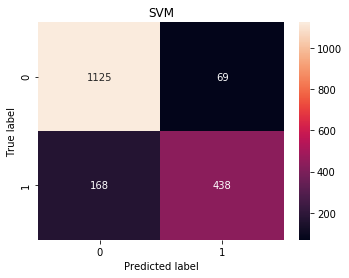

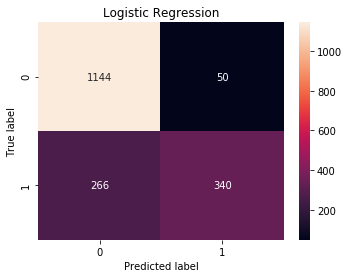

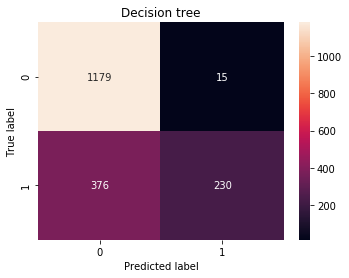

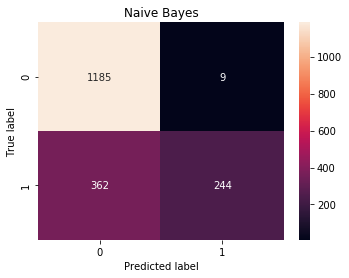

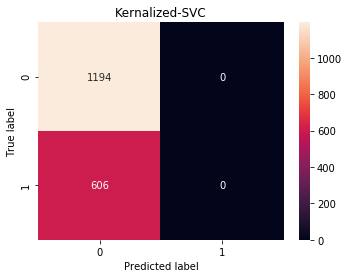

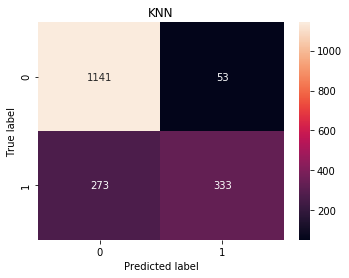

In [10]:
model_selection()

# Tuning Hyperparameters

validation report:

Confusion Matrix:
 [[491   9]
 [ 60 182]]


<IPython.core.display.Javascript object>


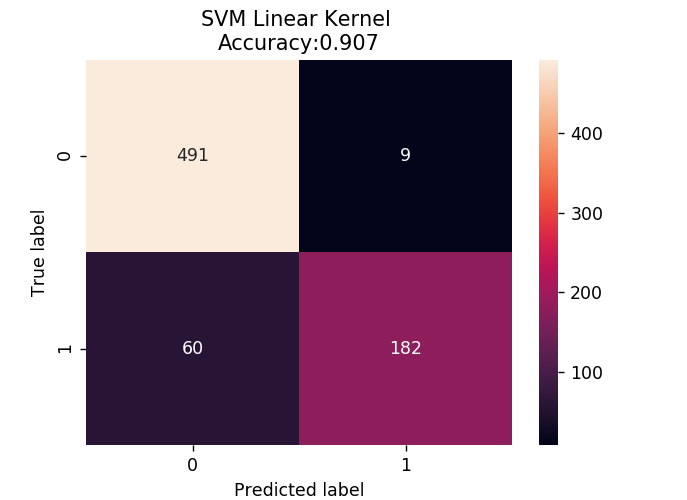

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       500
           1       0.95      0.75      0.84       242

    accuracy                           0.91       742
   macro avg       0.92      0.87      0.89       742
weighted avg       0.91      0.91      0.90       742

test accuracy: 0.9070080862533693
Micro-averaged precision = 0.91 (treat instances equally)
Macro-averaged precision = 0.92 (treat classes equally)
----------------------x-------------------------


In [11]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                        ('chi',  SelectKBest(chi2, k=5000)),
                        ('clf',LinearSVC(penalty='l2',C=1))])

X_train, X_test, y_train, y_test = train_test_split(train['clean'],train['label'], test_size=0.3,random_state=0)
model_validate=pipeline.fit(X_train,y_train)
y_pred=model_validate.predict(test['clean'])
final_test=test['label']

print("validation report:\n")
print("Confusion Matrix:\n",confusion_matrix(final_test,y_pred))
confusion=confusion_matrix(final_test,y_pred)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(final_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print("Classification report:\n",classification_report(final_test,y_pred))
print("test accuracy:",accuracy_score(final_test, y_pred))
print('Micro-averaged precision = {:.2f} (treat instances equally)'
        .format(precision_score(final_test, y_pred, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
        .format(precision_score(final_test, y_pred, average = 'macro')))
print("----------------------x-------------------------")

In [12]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                        ('chi',  SelectKBest(chi2, k=1000)),
                        ('clf',LinearSVC(penalty='l2'))])

grid_values = {'chi__k':[500,1000,2000,5000],
               'clf__C': [0.01,0.1,1,10,100],
              }

search = GridSearchCV(pipeline, param_grid = grid_values,scoring='roc_auc')
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.938):
{'chi__k': 5000, 'clf__C': 1}


# Multi model approach

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train['clean'],train['label'], test_size=0.3,random_state=0)
models=[]
result=pd.DataFrame(columns=None)
models.append(('SVM', LinearSVC(penalty='l2',C=1)))
models.append(('Logistic Regression', LogisticRegression(C=0.1)))
models.append(('Naive Bayes', MultinomialNB()))
for name,model in models:
    pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                        ('chi',  SelectKBest(chi2, k=5000)),
                        ('clf',model)])
    test_model = pipeline.fit(X_train, y_train)
    y_pred=test_model.predict(test['clean'])
    result[name]=y_pred
    

In [25]:
result.head()

,SVM,Logistic Regression,Naive Bayes
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [26]:
result['mean']=result.mean(axis=1)

In [31]:
result['Ensemble']=result['mean'].apply(lambda x: 1 if x>0.4 else 0)

<IPython.core.display.Javascript object>


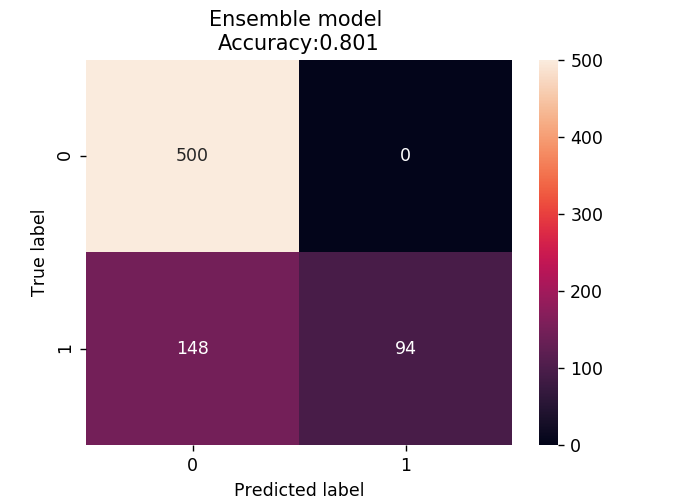

Classification report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       500
           1       1.00      0.39      0.56       242

    accuracy                           0.80       742
   macro avg       0.89      0.69      0.72       742
weighted avg       0.85      0.80      0.77       742

accuracy: 0.8005390835579514
Micro-averaged precision = 0.80 (treat instances equally)
Macro-averaged precision = 0.89 (treat classes equally)
----------------------x-------------------------


In [32]:
final_test=test['label']
y_pred=result['Ensemble']
confusion=confusion_matrix(final_test,y_pred)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Ensemble model \nAccuracy:{0:.3f}'.format(accuracy_score(final_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


print("Classification report:\n",classification_report(final_test,y_pred))
print("accuracy:",accuracy_score(final_test, y_pred))
print('Micro-averaged precision = {:.2f} (treat instances equally)'
        .format(precision_score(final_test, y_pred, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
        .format(precision_score(final_test, y_pred, average = 'macro')))
print("----------------------x-------------------------")